Notebook to classify the naive templates as El, Sp, Im/SB

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

from modules import get_bandpass_dict, Sed

In [2]:
# plotting style
%config InlineBackend.figure_format = 'retina'
plt.style.use('paper.mplstyle')
twocol = 7.1014
onecol = 3.35

In [3]:
bandpass_dict = get_bandpass_dict()

Calculate colors for each set of templates

In [5]:
cwwsb4 = np.loadtxt('templates/cwwsb4.list',dtype=str)
xcolor0 = []
ycolor0 = []
for template in cwwsb4:
    name = 'templates/'+template
    x,y = np.loadtxt(name,unpack=True)
    sed = Sed(x,y)
    
    fluxes = sed.fluxlist(bandpass_dict,['NUV','u','g'])
    xcolor0.append(2.5*np.log10(fluxes[1]/fluxes[0]))
    ycolor0.append(2.5*np.log10(fluxes[2]/fluxes[1]))
    
naive8 = ['N8_'+str(i+1)+'.sed' for i in range(8)]
xcolor8 = []
ycolor8 = []
for template in naive8:
    name = 'templates/'+template
    x,y = np.loadtxt(name,unpack=True)
    sed = Sed(x,y)
    
    fluxes = sed.fluxlist(bandpass_dict,['NUV','u','g'])
    xcolor8.append(2.5*np.log10(fluxes[1]/fluxes[0]))
    ycolor8.append(2.5*np.log10(fluxes[2]/fluxes[1]))
    
naive16 = ['N16_'+str(i+1)+'.sed' for i in range(16)]
xcolor16 = []
ycolor16 = []
for template in naive16:
    name = 'templates/'+template
    x,y = np.loadtxt(name,unpack=True)
    sed = Sed(x,y)
    
    fluxes = sed.fluxlist(bandpass_dict,['NUV','u','g'])
    xcolor16.append(2.5*np.log10(fluxes[1]/fluxes[0]))
    ycolor16.append(2.5*np.log10(fluxes[2]/fluxes[1]))

Function that matches the colors to the closest CWWSB4 template

In [6]:
def closest(x,y):
    distances = []
    for i,j in zip(xcolor0,ycolor0):
        distances.append((x-i)**2 + (y-j)**2)
    return np.array(distances).argmin()

Evaluate the function on a grid to make the background of the plot

In [7]:
# Calculate the nearest neighbor grid

X = np.linspace(-2,3,1000)
Y = np.linspace(-0.8,1.05,1000)
Z = []
for y in Y:
    row = []
    for x in X:
        row.append(closest(x,y))
    Z.append(row)

Plot the template colors on top of this grid

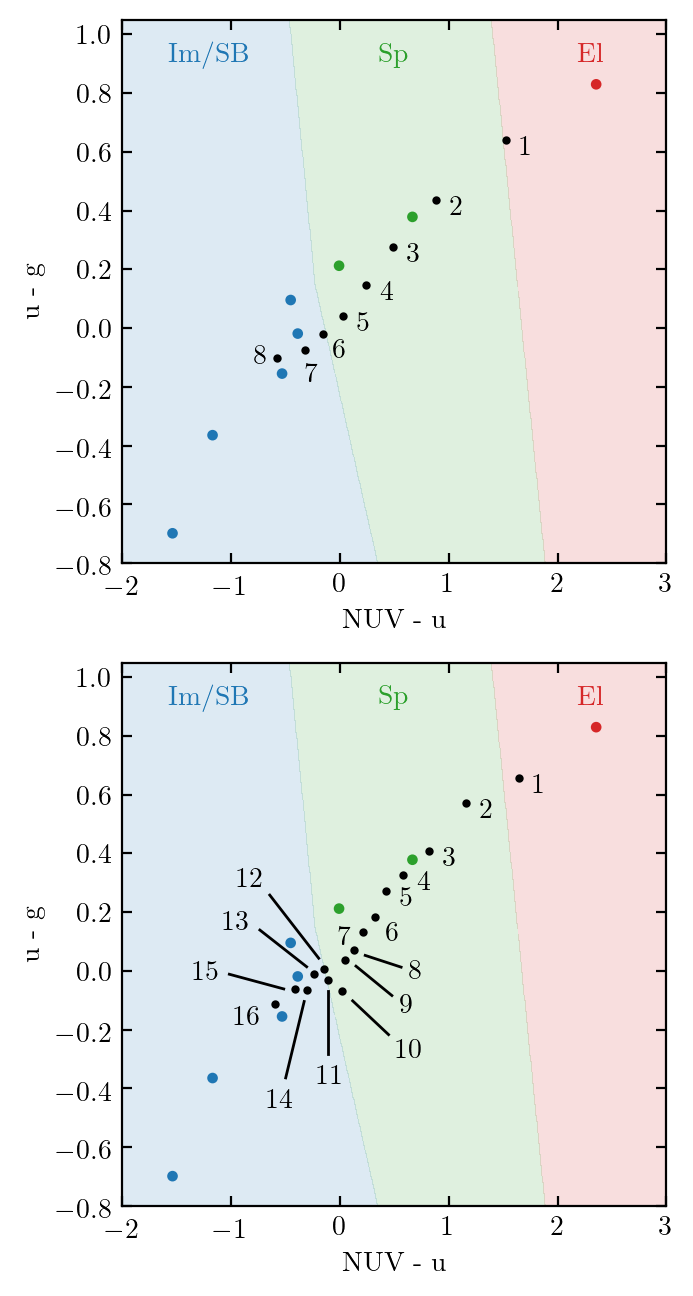

In [15]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(onecol,1.9*onecol),constrained_layout=True)


for ax in [ax1,ax2]:

    ax.contourf(X,Y,Z,[0,0.5,2.5,10],colors=['C3','C2','C0'],alpha=0.15)

    ax.scatter(xcolor0,ycolor0,c=['C3','C2','C2','C0','C0','C0','C0','C0'],s=8)

    ax.set_xlim(-2,3)
    ax.set_ylim(-0.8,1.05)

    ax.set_xlabel('NUV - u')
    ax.set_ylabel('u - g')

    ax.set_yticks([-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])

    ax.text(-1.2,0.93,'Im/SB',c='C0',ha='center',va='center')
    ax.text(0.5,0.93,'Sp',c='C2',ha='center',va='center')
    ax.text(2.3,0.93,'El',c='C3',ha='center',va='center')


# The 8 template colors

ax1.scatter(xcolor8,ycolor8,c='k')

for i,(x,y) in enumerate(zip(xcolor8,ycolor8)):
    if i <= 4:
        ax1.annotate(i+1,(x+0.13,y-0.05))
    if i == 5:
        ax1.annotate(i+1,(x+0.1,y-0.08))    
    if i == 6:
        ax1.annotate(i+1,(x,y-0.11))
    if i == 7:
        ax1.annotate(i+1,(x-0.22,y-0.02))
     
    
# The 16 template colors

ax.scatter(xcolor16,ycolor16,c='k')

for i,(x,y) in enumerate(zip(xcolor16,ycolor16)):
    if i <= 4:
        ax2.annotate(i+1,(x+0.13,y-0.05))
    if i == 5:
        ax2.annotate(i+1,(x+0.1,y-0.08))    
    if i == 6:
        ax2.annotate(i+1,(x-0.235,y-0.04))
    if i == 7:
        ax2.annotate(i+1,(x+0.5,y-0.1))
        ax2.plot([x+0.1,x+0.43],[y-0.02,y-0.06],c='k',lw=1)
    if i == 8:
        ax2.annotate(i+1,(x+0.5,y-0.18))
        ax2.plot([x+0.1,x+0.43],[y-0.02,y-0.12],c='k',lw=1)
    if i == 9:
        ax2.annotate(i+1,(x+0.5,y-0.23))
        ax2.plot([x+0.1,x+0.43],[y-0.035,y-0.15],c='k',lw=1)
    if i == 10:
        ax2.annotate(i+1,(x-0.1,y-0.35))
        ax2.plot([x,x],[y-0.035,y-0.25],c='k',lw=1)
    if i == 11:
        ax2.annotate(i+1,(x-0.8,y+0.28))
        ax2.plot([x-0.05,x-0.5],[y+0.035,y+0.25],c='k',lw=1)
    if i == 12:
        ax2.annotate(i+1,(x-0.84,y+0.15))
        ax2.plot([x-0.07,x-0.5],[y+0.025,y+0.15],c='k',lw=1)
    if i == 13:
        ax2.annotate(i+1,(x-0.37,y-0.4))
        ax2.plot([x-0.03,x-0.2],[y-0.04,y-0.3],c='k',lw=1)
    if i == 14:
        ax2.annotate(i+1,(x-0.93,y+0.03))
        ax2.plot([x-0.1,x-0.6],[y,y+0.05],c='k',lw=1)
    if i == 15:
        ax.annotate(i+1,(x-0.37,y-0.07))

#fig.tight_layout(pad=0, h_pad=0, w_pad=0)
#fig.savefig('plots/color_classify.pdf')

plt.show()